<h1 style="width: 600px; text-align: center; background: #FF9900; color: yellow; 
letter-spacing: 2px; line-height: 110%; font-weight:bold;">Positive Numbers<br /> represented by a<br />Binary Quadratic Form</h1>

<div style="width: 600px; text-align: justify;">
<hr style="width:610px; background-color:maroon; height:8px; margin-right:0; " />
<h2 style="color: maroon;">Introduction</h2>

<h3 style="color: maroon;">Definitions</h3>

<div style="width: 600px; text-align: justify;">

A binary quadratic form over Z is a quadratic homogeneous polynomial in two variables with integer coefficients, $ q(x, y) = ax^2 + bxy + cy^2 $. It is conveniently given by a list or tuple of 3 entries: $ (a, b, c) $.

A quadratic form $q(x, y)$ represents an integer $n$ if there exist integers $x$ and $y$ with $q(x, y) = n$. 
We say that $q$ primitively represents $n$ if there exist relatively prime integers $x$ and $y$ such that $q(x, y) = n$.

Positive definite forms are definite forms with $a > 0$. They can only represent positive numbers. 
Negative definite forms are definite forms with $a < 0$. They can represent only negative numbers. 
Indefinite forms can represent both positive and negative numbers.

The discriminant of a nondegenerate binary quadratic form is $b^2 - 4ac$. 
Inequivalent forms may have the same discriminant. 
Quadratic forms with different discriminants cannot be equivalent.

The aim of this notebook is to implement methods for calculating the numbers represented by a binary quadratic form in a uniform and efficient way 
using the Sage engine. It was inspired by the Wiki page on OEIS created by N. J. A. Sloane <a href="http://oeis.org/wiki/Binary_Quadratic_Forms_and_OEIS">"Binary Quadratic Forms and OEIS"</a>. </div>

<h3 style="color: maroon;">Geometric view</h3>

<div style="width: 640px;">
<p ><img src="http://oeis.org/w/images/c/c4/BinaryQF111LevelSet13.png" alt="" /></p>
</div>

<div style="width: 600px; text-align: justify;">

The graphic shows the level set of the binary quadratic form $ x^2 + xy + y^2$
and the lattice points of the level set 13. The integral values 
(x, y) = (3, 1), (1, 3), (-1, 4), (-3, 4), (-4, 3), (-4, 1), (-3, -1), (-1, -3), 
(1, -4), (3, -4), (4, -3) and (4, -1) are points of the ellipse. Therefore 13 is represented by the form.

</div>

<div style="width: 620px;">
<p><img src="http://oeis.org/w/images/b/b3/BinaryQF111LevelSet14.png" alt="" /></p>
</div>

<div style="width: 600px; text-align: justify;">

14 is not represented by the binary quadratic form $x^2 + xy + y^2$, 
no lattice points of the level set lie on the ellipse.

</div>

<h3 style="color: maroon;">Some examples at a glance</h3>

<div style="width: 600px; text-align: justify;">

The table below collocates a few sequences in the OEIS which list numbers represented by binary quadratic forms. If an entry in the table below shows multiple sequences this means that the sequences differ only by some initial terms or the equivalence of their definitions is not proved. 

<div style="width: 600px; text-align: justify;">

<center>
<table  cellpadding="4" cellspacing="6" border="1px solid #808000;"  style="text-align: center">
<tr style="font-size: small; color: blue; background-color:#FFD700; 
text-align:center">
<td>(a, b, c)</td>
<td>b^2 - 4ac</td>
<td>prime</td>
<td>primitively</td>
<td>positive</td>
</tr>
<tr>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">(1, 0, -3)</td>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">12</td>
<td ><a href="http://oeis.org/A068228">A068228</a>, <a href="http://oeis.org/A141122">A141122</a></td>
<td><a href="http://oeis.org/A243655">A243655</a></td>
<td><a href="http://oeis.org/A084916">A084916</a></td>
</tr>
<tr>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">(1, 1, -2)</td>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">9</td>
<td ><a href="http://oeis.org/A002476">A002476</a>, <a href="http://oeis.org/A007645">A007645</a></td>
<td><a href="http://oeis.org/A244713">A244713</a></td>
<td><a href="http://oeis.org/A056991">A056991</a>, <a href="http://oeis.org/A242660">A242660</a></td>
</tr>
<tr>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">(1, 0, -2)</td>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">8</td>
<td><a href="http://oeis.org/A001132">A001132</a>, <a href="http://oeis.org/A038873">A038873</a></td>
<td><a href="http://oeis.org/A057126">A057126</a></td>
<td><a href="http://oeis.org/A035251">A035251</a></td>
</tr>
<tr>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">(1, 1, -1)</td>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">5</td>
<td><a href="http://oeis.org/A038872">A038872</a>, <a href="http://oeis.org/A141158">A141158</a></td>
<td><a href="http://oeis.org/A089270">A089270</a></td>
<td><a href="http://oeis.org/A031363">A031363</a></td>
</tr>
<tr>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">(1, 0, -1)</td>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">4</td>
<td ><a href="http://oeis.org/A065091">A065091</a></td>
<td><a href="http://oeis.org/A047486">A047486</a></td>
<td><a href="http://oeis.org/A042965">A042965</a></td>
</tr>
<tr>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">(1, 1, 1)</td>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">-3</td>
<td><a href="http://oeis.org/A002476">A002476</a>, <a href="http://oeis.org/A007645">A007645</a></td>
<td><span><a href="http://oeis.org/A034017">A034017</a></span></td>
<td><a href="http://oeis.org/A003136">A003136</a>, <a href="http://oeis.org/A035238">A035238</a>,<br />
<a href="http://oeis.org/A045375">A045375</a>, <a href="http://oeis.org/A123365">A123365</a>,<br />
<a href="http://oeis.org/A144919">A144919</a>, <a href="http://oeis.org/A144921">A144921</a></td>
</tr>
<tr>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">(1, 0 ,1)</td>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">-4</td>
<td ><a href="http://oeis.org/A002144">A002144</a>, <a href="http://oeis.org/A002313">A002313</a></td>
<td><a href="http://oeis.org/A008784">A008784</a></td>
<td><a href="http://oeis.org/A001481">A001481</a></td>
</tr>
<tr>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">(1, 1, 2)</td>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">-7</td>
<td ><a href="http://oeis.org/A033207">A033207</a>, <a href="http://oeis.org/A045373">A045373</a></td>
<td><a href="http://oeis.org/A244779">A244779</a></td>
<td><a href="http://oeis.org/A028951">A028951</a>, <a href="http://oeis.org/A035248">A035248</a> </td>
</tr>
<tr>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">(1, 0 , 2)</td>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">-8</td>
<td ><a href="http://oeis.org/A033200">A033200</a>, <a href="http://oeis.org/A033203">A033203</a></td>
<td><a href="http://oeis.org/A057127">A057127</a></td>
<td><a href="http://oeis.org/A002479">A002479</a> </td>
</tr>
<tr>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align:center">(1, 1, 3)</td>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align:center">-11</td>
<td ><a href="http://oeis.org/A056874">A056874</a></td>
<td><a href="http://oeis.org/A244780">A244780</a></td>
<td><a href="http://oeis.org/A028954">A028954</a>, <a href="http://oeis.org/A035247">A035247</a> </td>
</tr>
<tr>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">(1, 0, 3)</td>
<td style="font-size: small; color: blue; background-color:#FFD700; text-align: center">-12</td>
<td><a href="https://oeis.org/A002476">A002476</a>, <a href="https://oeis.org/A007645">A007645</a></td>
<td><a href="https://oeis.org/A244819">A244819</a></td>
<td><a href="https://oeis.org/A003136">A003136</a> </td>
</tr></table></center>

<div style="width: 600px; text-align: justify;">

The oldest sequences in the table (defined here by the lowest A-number) are (apart from the natural numbers and the prime numbers) A001132 (primes &equiv; &plusmn; 1 mod 8) and A001481 (numbers that are the sum of 2 squares), which nicely sets the arithmetic theme. 

Note that only numbers n &equiv; 0 (mod 4) or n &equiv; 1 (mod 4) can be a discriminant (..., -8, -7, -4, -3, 0, 1, 4, 5, 8, ...). 

Also note that reading a row in the table from the left to the right we have the inclusion &quot;represented primes&quot; &#8838; &quot;primitively represented&quot; &#8838; &quot;represented positives&quot;. For example in the case of discriminant 4 the inclusion is A065091 &#8838; A047486 &#8838; A042965 where &#39;&#8838;&#39; is to be read as &#39;is subsequence of&#39;.

Prime numbers which are represented by a binary quadratic form are primitively represented by this form. N. J. A. Sloane gave the following proof on the seqfan list:

For if $ax^2 + bxy + cy^2 = p$ and gcd $(x, y) = d \gt 1$, then $d$ divides $p$, so $d = p$. Then let $x = pX$, $y = pY$, so $ap^2X^2 + bp^2XY + cp^2Y^2 = p$, so $p^2$ divides $p$, a contradiction.

<div style="width: 600px; text-align: justify;">
<hr style="width:610px; background-color:maroon; height:8px; margin-right:0; " />
<h2 style="color: maroon;">The Python-Sage class 'binaryQF(a,b,c)'.</h2>

<h3 style="color: maroon;">Algorithms</h3>

<div style="width: 600px; text-align: justify;">

We consider 9 cases in dependence of the determinant $D = b^2 - 4ac$ and 
required restrictions on the generated integers: _prime_, or 
_primitively represented_, or _all_ positive values. 
The table below shows the algorithms used.

<ul>
<li>sfb: Extension of Neil Sloane's 'fb' function.</li>
<li>qfb: Pari's qfbsolve function.</li>
<li>qfs: A search function based on a hint by Robert Israel.</li>
<li>qfr: Pari's qfrep function.</li>
<li>jcp: Port of Will Jagy's C++ programs <em>Conway-PositivePrimitive</em> and  <em>Conway-PositiveAll</em>.</li>
</ul>

<div style="width: 600px; text-align: justify;">

<center>
<table style="text-align: center; border-style: solid; border-width: 2px;" cellspacing="4" cellpadding="4"><caption style="font-size:larger">Algorithms used in the class binaryQF</caption>
<tbody>
<tr style="text-align: left; color: blue; background-color: #ffcc66;">
<td>D = b^2 - 4ac, D != 0</td>
<td>prime</td>
<td>primitively</td>
<td>positive</td>
</tr>
<tr>
<td style="text-align: left; color: blue; background-color: #ffcc66;">D = k^2, k != 0 (square)</td>
<td>sfb&nbsp;</td>
<td>sfb&nbsp;</td>
<td>sfb&nbsp;</td>
</tr>
<tr>
<td style="text-align: left; color: blue; background-color: #ffcc66;">D &lt; 0 (definite, imaginary)</td>
<td>qfb&nbsp;</td>
<td>qfs&nbsp;</td>
<td>qfr&nbsp;</td>
</tr>
<tr>
<td style="text-align: left; color: blue; background-color: #ffcc66;">D &gt; 0 (indefinite, real)</td>
<td>jcp&nbsp;</td>
<td>jcp&nbsp;</td>
<td>jcp&nbsp;</td>
</tr>
</tbody></table></center>

<div style="width: 600px; text-align: justify;">
<h3 style="color: maroon;">The constructor</h3>

<pre style="color: maroon">    binaryQF([a, b, c])
</pre>
    
This is the constructor of the class 'binaryQF'. 
$ a, b, c$ are the integer coefficients of the quadratic form
$ q(x, y) = ax^2 + bxy + cy^2 $. 

<div style="width: 600px; text-align: justify;">
<h3 style="color: maroon;">The main function</h3>

Return all numbers represented by the quadratic form subject to
the constraint _subset_, which is _all_, _primitively_ or _prime_
up to the bound _upto_. 

<pre style="color: maroon">represented_positives( 
    upto,    [search the range (1..upto)]
    subset,  ['all' or 'primitively' or 'prime', default 'all']
    verbose  [print messages, default True]
)</pre>
    
The function is a member of the class 'binaryQF'. 
All other functions in this class are internal functions of the 
class and need not be addressed by a user.

<h3 style="color: maroon;">Batteries included</h3>
<div style="width: 600px; text-align: justify;">

We add a OEIS-query function:

<p style="color: maroon;">&nbsp;&nbsp;&nbsp;oeis_bqf(q, filter, upto, terse)</p>

The function tries to find sequences in the OEIS whose terms are represented
by the binary quadratic form with coefficients $q = [a, b, c]$ and which are
restricted according to the _filter_, which is one of _all_, _primitively_,
_prime_ or _tutti_. The parameter _upto_ gives the upper bound of the search range,
which is 100 by default. If _terse_ is _True_ the output will be a compact
one-liner; otherwise the output is more verbose. With the parameter _values_ you
can switch off the display of the values; it is set to _True_ by default. 
To use the function you have to be connected to the Internet.

<h3 style="color: maroon;">Example</h3>
<div style="width: 600px; text-align: justify;">
A typical use case is: 

<pre> 
    Q = binaryQF([5, 4, 2])
    Q.represented_positives(100, 'prime')
</pre>

This will output:

<pre>    Original form  [5, 4, 2] with discriminant -24
    Reduced form   [2, 0, 3]
    There are 8 primes represented up to 100
    [2, 3, 5, 11, 29, 53, 59, 83]
</pre>

One can feed this output into Sage's oeis function 

<pre>    oeis([2, 3, 5, 11, 29, 53, 59, 83])
</pre>

which returns:

<pre>
    0: A084865: Primes of the form 2x^2 + 3y^2.
</pre>

Alternatively you can call directly

<pre>    oeis_bqf([5, 4, 2], 'prime')
</pre>

which prints:

<pre>[-24] [5, 4, 2] prime ['A084865']
[2, 3, 5, 11, 29, 53, 59, 83, 101, 107, 131, 149]
</pre> 


This shows the _discriminant_ of the form, the _coefficient list_, 
the type of the constraint, and OEIS _sequence numbers_ in the first line.
The second line displays the first few _values_ of integers
represented by the form. Setting the parameter _terse = True_ will
output only the first line.

<div style="width: 600px; text-align: justify;">
<hr style="width:610px; background-color:maroon; height:8px; margin-right:0; " />
<h2 style="color: maroon;">Implementation</h2>

In [1]:
from typing import Any as Any, Generator, NoReturn as NoReturn
from sage.calculus.var import var
from sage.rings.integer import Integer
from sage.rings.integer_ring import ZZ
from sage.arith.misc import is_square, is_prime, next_prime, gcd
from sage.misc.functional import isqrt, sqrt
from sage.functions.other import floor, ceil
from sage.matrix.constructor import Matrix

In [2]:
class binaryQF():
    """
    A binary quadratic form over Z.
    Input: a list of 3 entries: [a, b, c]
    """

    def __init__(self, 
        abc: list[int]
    ) -> None:

        self._a: Integer = ZZ(abc[0])
        self._b: Integer = ZZ(abc[1])
        self._c: Integer = ZZ(abc[2])


    def discriminant(self
    ) -> Integer:

        return self._b ** 2 - 4 * self._a * self._c


    def sqr_disc(self, 
        M: int, 
        primitively: bool = False
    ) -> list[Integer]:

        d = self.discriminant()
        if d == 0:
            raise ValueError("Discriminant must not be zero")

        a, b, c = self._a, self._b, self._c
        if a == 0 and c == 0: # and b != 0
            return [b * n for n in range(1, 1 + M // abs(b))]

        D = Integer(d).sqrtrem()[0]

        # a must be != 0
        if a == 0: # then c <> 0; swap
            a = c
            c = 0

        k = 2 * D; m = 4 * a * D
        u = b + D; v = b - D
        S = set[Integer]()

        # Solvability in Z.
        for n in range(1, M + 1):
            h = 4 * a * n  # a <> 0 and n <> 0
            for t in h.divisors():
                g = h // t
                if k.divides(g - t) and m.divides(g * u - t * v):

                    if primitively:
                        y = (g - t) // k
                        x = var('x')
                        eq = a * x * x + b * x * y + c * y * y
                        R = (eq - n).roots(multiplicities = False, ring = ZZ)
                        x = R[0]

                        if gcd(x, y) == 1:
                            S.add(n)
                            break
                    else:
                        S.add(n)
                        break

        return sorted(list(S))


    def imag_prime(self, 
        M: int
    ) -> list[Integer]:

        solve = pari('qfbsolve')
        Q = pari('Qfb')(self._a, self._b, self._c)
        p = 1
        r = []

        while True:
            p = next_prime(p)
            if p > M: break
            if solve(Q, p):
                r.append(p)
        return r


    def imag_primitively(self, 
        M: int
    ) -> list[Integer]:

        a, b, c = self._a, self._b, self._c
        d = c - (b * b) / (4 * a) 
        A : list[Integer] = []

        for y in range(1 + isqrt(M / d)):
            r = (y * b) / (2 * a)
            s = sqrt((M - d * y * y) / a)
            for x in range(ceil(-s -r), 1 + floor(s - r)):
                if gcd(x, y) == 1:
                    A.append(a * x^2 + b * x * y + c * y^2) 

        return sorted(list(set(A)))


    def imag_all(self, 
        M: int
    ) -> list[Integer]:

        L = [2 * ZZ(self._a), ZZ(self._b), ZZ(self._b), 2*ZZ(self._c)]
        G = Matrix(ZZ, 2, 2, L)
        A = pari('qfrep')(G, M, 1)
        return [k + 1 for k in range(M) if A[k] > 0]


    def _primitive_reps(self, 
        a: Integer, 
        h: Integer, 
        b: Integer, 
        M: int, 
        S: set[Integer]
    ) -> None:

        if a <= M :
            S.add(a)
            if b <= M :
                S.add(b)
                if a <= (M - b) and h <= (M - a - b) :
                    if a <= (M - a - h) :
                        self._primitive_reps(a, h + 2 * a, a + b + h, M, S)
                    if b <= (M - b - h) :
                        self._primitive_reps(a + b + h, h + 2 * b, b, M, S)


    def positive_primitives(self, 
        M: int, 
        primitively: bool
    ) -> set[Integer]:

        a, b, c = self._a, self._b, self._c

        S = set[Integer]()
        while True:
            new_val = a + b + c
            if new_val > 0 :
                self._primitive_reps(a, b + 2 * a, new_val, M, S)
                b += 2 * c
                a = new_val
            elif new_val < 0 :
                b += 2 * a
                c = new_val
            if a == self._a and b == self._b and c == self._c:
                break

        if not primitively :
            X = set[Integer]()
            for p in S:
                q = t = 1
                while q <= M :
                    X.add(q)
                    q = t * t * p
                    t += 1
            S = X

        return S


    def reduce_real(self
    ) -> list[Integer]:

        d = self.discriminant()
        if is_square(d):
            raise ValueError("Form must not have square discriminant")

        droot = Integer(d).sqrtrem()[0]
        a, b, c = self._a, self._b, self._c

        while a <= 0 or c >= 0 or b <= abs(a + c):

            cAbs = c
            if cAbs < 0: cAbs *= -1

            # cAbs = 0 will not happen for a non square form
            delta = (b + droot) // (2 * cAbs)
            if c < 0: delta *= -1
            aa = c
            bb = 2 * c * delta - b
            cc = c * delta * delta - b * delta + a
            a, b, c = aa, bb, cc

        return [a, b, c]


    def reduce_imag(self
    ) -> list[Integer]:

        a, b, c = self._a, self._b, self._c
        if a < 0: a, b, c = -a, -b, -c
        d = self.discriminant()

        while True:
            A = ( a == c and b < 0) or (c < a)
            B = (-a == b and a < c) or (a < abs(b))

            if not (A or B) : break

            if A: a, b, c = c, -b, a

            if B:
                b -= 2 * a * (b // (2 * a))
                if abs(b) > a: b -= 2 * a
                c = (b * b - d) // (4 * a)

        return [a, b, c]


    def is_reduced(self
    ) -> bool:

        a, b, c = self._a, self._b, self._c
        return (-a < b <= a < c) or (ZZ(0) <= b <= a == c)


    def reduced_form(self):
        """
        Returns the unique reduced form equivalent to binaryQF(a, b, c)
        """

        if self.is_reduced() :
            return self

        if self.discriminant() >= 0:
            r = self.reduce_real()
        else:
            r = self.reduce_imag()

        return binaryQF(r)


    def represented_positives(self, 
        upto: int, 
        subset: str = "all", 
        verbose: bool = True
    ) -> list[Integer]:
        """
        subset = "all" or "primitively" or "prime"
        """

        prime = False or subset == "prime"
        primitively = False or subset == "primitively"

        d = self.discriminant()
        if d == 0:
            raise ValueError("discriminant must not be 0")

        a, b, c = self._a, self._b, self._c
        if verbose:
            print("Original form ", [a, b, c], "with discriminant", d)

        if is_square(d):
            if verbose:
                print("Square discriminant!")

            if prime:  # for efficiency
                primitively = False
            pp = self.sqr_disc(upto, primitively)
            if prime:
                pp = list(filter(is_prime, pp))

        else:

            R = self.reduced_form()
            if verbose:
                print("Reduced form  ", [R._a, R._b, R._c])

            if d < 0:

                if prime:
                    pp = R.imag_prime(upto)
                else:
                    if primitively:
                        pp = R.imag_primitively(upto)
                    else:
                        pp = R.imag_all(upto)

            # real case, indefinite form
            else: # d > 0 and not square

                if prime:  # for efficiency
                    primitively = True
                pp = R.positive_primitives(upto, primitively)
                if prime:
                    pp = list(filter(is_prime, pp))
                pp = sorted(pp)

        if verbose:
            msg0 = "primes" if prime else "positive integers"
            msg1 = "primitively" if primitively else ""
            msg2 = "represented up to"
            print("There are", len(pp), msg0, msg1, msg2, upto)

        return pp

<div style="width: 600px; text-align: justify;">
<hr style="width:610px; background-color:maroon; height:8px; margin-right:0; " />
<h2 style="color: maroon;">Computations</h2>

<pre style="color: maroon;"><a href="https://oeis.org/A243655">A243655</a>

Original form [1, 0, -3] with discriminant 12.
Reduced form  [1, 2, -2]
There are 13 positive integers primitively represented up to 100.
[1, 6, 13, 22, 33, 37, 46, 61, 69, 73, 78, 94, 97]</pre>

In [3]:
Q = binaryQF([1, 0, -3])
Q.represented_positives(100, 'primitively')

Original form  [1, 0, -3] with discriminant 12
Reduced form   [1, 2, -2]
There are 13 positive integers primitively represented up to 100


[1, 6, 13, 22, 33, 37, 46, 61, 69, 73, 78, 94, 97]

<pre style="color: maroon;"><a href="https://oeis.org/A243655">A244291</a>

Original form  [1, 6, -3] with discriminant 48
Reduced form   [1, 6, -3]
There are 12 positive integers primitively represented up to 100
[1, 4, 13, 24, 33, 37, 52, 61, 69, 73, 88, 97]
</pre>

In [4]:
Q = binaryQF([1, 6, -3])
Q.represented_positives(100, 'primitively')

Original form  [1, 6, -3] with discriminant 48
Reduced form   [1, 6, -3]
There are 12 positive integers primitively represented up to 100


[1, 4, 13, 24, 33, 37, 52, 61, 69, 73, 88, 97]

<pre style="color: maroon;"><a href="https://oeis.org/A084916">A084916</a>

Original form [1, 0, -3] with discriminant 12
Reduced form  [1, 2, -2]
There are 14 positive integers represented up to 50
[1, 4, 6, 9, 13, 16, 22, 24, 25, 33, 36, 37, 46, 49]
</pre>

In [5]:
Q = binaryQF([1, 0, -3])
Q.represented_positives(50)

Original form  [1, 0, -3] with discriminant 12
Reduced form   [1, 2, -2]
There are 14 positive integers  represented up to 50


[1, 4, 6, 9, 13, 16, 22, 24, 25, 33, 36, 37, 46, 49]

<pre style="color: maroon;"><a href="https://oeis.org/A141175">A141175</a>

Original form [-1, 4, 4] with discriminant 32.
Reduced form  [4, 4, -1]
There are 6 primes represented up to 100.
[7, 23, 31, 47, 71, 79]
</pre>

In [6]:
Q = binaryQF([-1, 4, 4]) 
Q.represented_positives(100, 'prime')

Original form  [-1, 4, 4] with discriminant 32
Reduced form   [4, 4, -1]
There are 6 primes primitively represented up to 100


[7, 23, 31, 47, 71, 79]

In [7]:
Q = binaryQF([7, 12, 4]) 
Q.represented_positives(100, 'prime')

Original form  [7, 12, 4] with discriminant 32
Reduced form   [4, 4, -1]
There are 6 primes primitively represented up to 100


[7, 23, 31, 47, 71, 79]

<pre style="color: maroon;"><a href="https://oeis.org/A035269">A035269</a>

Original form [2, 3, -4] with discriminant 41.
Reduced form  [2, 3, -4]
There are 14 positive integers represented up to 33.
[1, 2, 4, 5, 8, 9, 10, 16, 18, 20, 23, 25, 31, 32]
</pre>

In [8]:
Q = binaryQF([2, 3, -4]) 
Q.represented_positives(33)

Original form  [2, 3, -4] with discriminant 41
Reduced form   [2, 3, -4]
There are 14 positive integers  represented up to 33


[1, 2, 4, 5, 8, 9, 10, 16, 18, 20, 23, 25, 31, 32]

<pre style="color: maroon;"><a href="https://oeis.org/A056991">A056991</a>&nbsp;<a href="https://oeis.org/A242660">A242660</a>

Original form [1, 1, -2] with discriminant 9.
Square discriminant!
There are 13 positive integers represented up to 30
[1, 4, 7, 9, 10, 13, 16, 18, 19, 22, 25, 27, 28]
</pre>

In [9]:
Q = binaryQF([1, 1, -2])
Q.represented_positives(30)

Original form  [1, 1, -2] with discriminant 9
Square discriminant!
There are 13 positive integers  represented up to 30


[1, 4, 7, 9, 10, 13, 16, 18, 19, 22, 25, 27, 28]

<pre style="color: maroon;"><a href="https://oeis.org/A002476">A002476</a>

Original form [1, 1, -2] with discriminant 9.
Square discriminant!
There are 11 primes represented up to 100.
[7, 13, 19, 31, 37, 43, 61, 67, 73, 79, 97]
</pre>

In [10]:
Q = binaryQF([1, 1, -2]) 
Q.represented_positives(100, 'prime')

Original form  [1, 1, -2] with discriminant 9
Square discriminant!
There are 11 primes  represented up to 100


[7, 13, 19, 31, 37, 43, 61, 67, 73, 79, 97]

<pre style="color: maroon;"><a href="https://oeis.org/A107132">A107132</a>

Original form [2, 0, 13] with discriminant -104.
Reduced form  [2, 0, 13]
There are 10 primes represented up to 500.
[2, 13, 31, 149, 167, 317, 359, 397, 463, 487]
</pre>

In [11]:
Q = binaryQF([2, 0, 13]) 
Q.represented_positives(500, 'prime')

Original form  [2, 0, 13] with discriminant -104
Reduced form   [2, 0, 13]
There are 10 primes  represented up to 500


[2, 13, 31, 149, 167, 317, 359, 397, 463, 487]

<pre style="color: maroon;"><a href="https://oeis.org/A045373">A045373</a>

Original form [1, 1, 2] with discriminant -7.
Reduced form  [1, 1, 2]
There are 13 primes represented up to 109.
[2, 7, 11, 23, 29, 37, 43, 53, 67, 71, 79, 107, 109]
</pre>

In [12]:
Q = binaryQF([1, 1, 2]) 
Q.represented_positives(109, 'prime')

Original form  [1, 1, 2] with discriminant -7
Reduced form   [1, 1, 2]
There are 13 primes  represented up to 109


[2, 7, 11, 23, 29, 37, 43, 53, 67, 71, 79, 107, 109]

<pre style="color: maroon;"><a href="https://oeis.org/A033203">A033203</a>

Original form [1, 0, 2] with discriminant -8 
Reduced form  [1, 0, 2]
There are 13 primes represented up to 100.
[2, 3, 11, 17, 19, 41, 43, 59, 67, 73, 83, 89, 97]
</pre>

In [13]:
Q = binaryQF([1, 0, 2]) 
Q.represented_positives(100, 'prime')

Original form  [1, 0, 2] with discriminant -8
Reduced form   [1, 0, 2]
There are 13 primes  represented up to 100


[2, 3, 11, 17, 19, 41, 43, 59, 67, 73, 83, 89, 97]

<pre style="color: maroon;">

Original form [2, -1, 17] with discriminant -135 
Reduced form  [2, -1, 17]
There are 1609 primes represented up to 100000.
[2, 17, 23, 53, 83, 137, ..., 99623, 99707, 99713, 99833]
</pre>

In [14]:
Q = binaryQF([2, -1, 17]) 
# print(Q.represented_positives(100000, 'prime'))

<pre style="color: maroon;"><a href="https://oeis.org/A028951">A028951</a>, <a href="https://oeis.org/A035248">A035248</a>.

Original form [1, 1, 2] with discriminant -7
There are 15 positive integers represented up to 30
[1, 2, 4, 7, 8, 9, 11, 14, 16, 18, 22, 23, 25, 28, 29]
<pre>

In [15]:
Q = binaryQF([1, 1, 2]) 
Q.represented_positives(30)

Original form  [1, 1, 2] with discriminant -7
Reduced form   [1, 1, 2]
There are 15 positive integers  represented up to 30


[1, 2, 4, 7, 8, 9, 11, 14, 16, 18, 22, 23, 25, 28, 29]

<pre style="color: maroon;"><a href="https://oeis.org/A003136">A003136</a>

Original form [1, 1, 1] with discriminant -3
Reduced form  [1, 1, 1]
There are 13 positive integers represented up to 30
[1, 3, 4, 7, 9, 12, 13, 16, 19, 21, 25, 27, 28]
</pre>

In [16]:
Q = binaryQF([1, 1, 1]) 
Q.represented_positives(30)

Original form  [1, 1, 1] with discriminant -3
Reduced form   [1, 1, 1]
There are 13 positive integers  represented up to 30


[1, 3, 4, 7, 9, 12, 13, 16, 19, 21, 25, 27, 28]

<pre style="color: maroon;"><a href="https://oeis.org/A001481">A001481</a>

Original form [1, 0, 1] with discriminant -4
Reduced form  [1, 0, 1]
There are 15 positive integers represented up to 30
[1, 2, 4, 5, 8, 9, 10, 13, 16, 17, 18, 20, 25, 26, 29]
</pre>

In [17]:
Q = binaryQF([1, 0, 1]) 
Q.represented_positives(30)

Original form  [1, 0, 1] with discriminant -4
Reduced form   [1, 0, 1]
There are 15 positive integers  represented up to 30


[1, 2, 4, 5, 8, 9, 10, 13, 16, 17, 18, 20, 25, 26, 29]

<pre style="color: maroon;"><a href="https://oeis.org/A244019">A244019</a>

Original form [9, 6, 1849] with discriminant -66528
Reduced form  [9, 6, 1849]
There are 44 primes represented up to 18000
[1873, 2017, 2137, 2377, 2473, 2689, 3217, 3529, 3697, 4057, 4657, 5569, 
6073, 6337, 7177, 7393, 7417, 7561, 7681, 7753, 8017, 8089, 8233, 8353,
8737, 8761, 9241, 9601, 9769, 11113, 11257, 11617, 12049, 12433, 12457,
12721, 13297, 13633, 13729, 14281, 15073, 15313, 16417, 17977]
<pre>

In [18]:
Q = binaryQF([9, 6, 1849])
print(Q.represented_positives(18000, 'prime'))

Original form  [9, 6, 1849] with discriminant -66528
Reduced form   [9, 6, 1849]
There are 44 primes  represented up to 18000
[1873, 2017, 2137, 2377, 2473, 2689, 3217, 3529, 3697, 4057, 4657, 5569, 6073, 6337, 7177, 7393, 7417, 7561, 7681, 7753, 8017, 8089, 8233, 8353, 8737, 8761, 9241, 9601, 9769, 11113, 11257, 11617, 12049, 12433, 12457, 12721, 13297, 13633, 13729, 14281, 15073, 15313, 16417, 17977]


<pre style="color: maroon;"><a href="https://oeis.org/A139668">A139668</a>

Original form [1, 0, 1848] with discriminant -7392
Reduced form  [1, 0, 1848]
There are 49 primes represented up to 18000
[1873, 2017, 2137, 2377, 2473, 2689, 3217, 3529, 3697, 4057, 4657, 5569,
6073, 6337, 7177, 7393, 7417, 7561, 7681, 7753, 8017, 8089, 8233, 8353,
8737, 8761, 9241, 9601, 9769, 11113, 11257, 11617, 12049, 12433, 12457,
12721, 13297, 13633, 13729, 14281, 15073, 15313, 16417, 16633, 16657,
16921, 16993, 17257, 17977]
</pre>

In [19]:
Q = binaryQF([1, 0, 1848]) 
print(Q.represented_positives(18000, 'prime'))

Original form  [1, 0, 1848] with discriminant -7392
Reduced form   [1, 0, 1848]
There are 49 primes  represented up to 18000
[1873, 2017, 2137, 2377, 2473, 2689, 3217, 3529, 3697, 4057, 4657, 5569, 6073, 6337, 7177, 7393, 7417, 7561, 7681, 7753, 8017, 8089, 8233, 8353, 8737, 8761, 9241, 9601, 9769, 11113, 11257, 11617, 12049, 12433, 12457, 12721, 13297, 13633, 13729, 14281, 15073, 15313, 16417, 16633, 16657, 16921, 16993, 17257, 17977]


<pre style="color: maroon;">

Original form [0, 233, 3] with discriminant 54289
Square discriminant!
There are 4 primes represented up to 2000
[3, 311, 1709, 1867]
</pre>

In [20]:
Q = binaryQF([0, 233, 3])
Q.represented_positives(2000, 'prime')

Original form  [0, 233, 3] with discriminant 54289
Square discriminant!
There are 4 primes  represented up to 2000


[3, 311, 1709, 1867]

In [21]:
Q = binaryQF([3, 229, -154])
Q.represented_positives(2000, 'prime')

Original form  [3, 229, -154] with discriminant 54289
Square discriminant!
There are 4 primes  represented up to 2000


[3, 311, 1709, 1867]

<pre style="color: maroon;"><a href="https://oeis.org/A141175">A141175</a>, <a href="https://oeis.org/A007522">A007522</a>

Original form [-1, 0, 8] with discriminant 32
Reduced form  [4, 4, -1]
There are 6 primes represented up to 100
[7, 23, 31, 47, 71, 79]
</pre>

In [22]:
Q = binaryQF([-1, 0, 8])
Q.represented_positives(100, 'prime')

Original form  [-1, 0, 8] with discriminant 32
Reduced form   [4, 4, -1]
There are 6 primes primitively represented up to 100


[7, 23, 31, 47, 71, 79]

<pre style="color: maroon;"><a href="https://oeis.org/A035269">A035269</a>

Original form [-5, 1, 2] with discriminant 41
Reduced form  [2, 3, -4]
There are 14 positive integers represented up to 33
[1, 2, 4, 5, 8, 9, 10, 16, 18, 20, 23, 25, 31, 32]
</pre>

In [23]:
Q = binaryQF([-5, 1, 2])
Q.represented_positives(33)

Original form  [-5, 1, 2] with discriminant 41
Reduced form   [2, 3, -4]
There are 14 positive integers  represented up to 33


[1, 2, 4, 5, 8, 9, 10, 16, 18, 20, 23, 25, 31, 32]

<pre style="color: maroon;"><a href="https://oeis.org/A002313">A002313</a>

Original form [41, 100, 61] with discriminant -4
Reduced form  [1,    0,  1]
There are 7 primes represented up to 50
[2, 5, 13, 17, 29, 37, 41]
</pre>

In [24]:
Q = binaryQF([41, 100, 61])
Q.represented_positives(50, 'prime')

Original form  [41, 100, 61] with discriminant -4
Reduced form   [1, 0, 1]
There are 7 primes  represented up to 50


[2, 5, 13, 17, 29, 37, 41]

<pre style="color: maroon;"><a href="https://oeis.org/A002479">A002479</a>

Original form [-1, -2, -3] with discriminant -8
Reduced form  [1,   0,  2]
There are 17 positive integers represented up to 30
[1, 2, 3, 4, 6, 8, 9, 11, 12, 16, 17, 18, 19, 22, 24, 25, 27]
</pre>

In [25]:
Q = binaryQF([-1, -2, -3])
Q.represented_positives(30)

Original form  [-1, -2, -3] with discriminant -8
Reduced form   [1, 0, 2]
There are 17 positive integers  represented up to 30


[1, 2, 3, 4, 6, 8, 9, 11, 12, 16, 17, 18, 19, 22, 24, 25, 27]

<pre style="color: maroon;"><a href="https://oeis.org/A035251">A035251</a>

Original form [1, 0, -2] with discriminant 8
Reduced form  [1, 2, -1]
There are 13 positive integers represented up to 30
[1, 2, 4, 7, 8, 9, 14, 16, 17, 18, 23, 25, 28]
</pre>

In [26]:
Q = binaryQF([1, 0, -2])
Q.represented_positives(30)

Original form  [1, 0, -2] with discriminant 8
Reduced form   [1, 2, -1]
There are 13 positive integers  represented up to 30


[1, 2, 4, 7, 8, 9, 14, 16, 17, 18, 23, 25, 28]

<pre style="color: maroon;"><a href="https://oeis.org/A002480">A002480</a>

Original form [5, 4, 2] with discriminant -24
Reduced form  [2, 0, 3]
There are 15 positive integers represented up to 40
[2, 3, 5, 8, 11, 12, 14, 18, 20, 21, 27, 29, 30, 32, 35]
</pre>

In [27]:
Q = binaryQF([5, 4, 2])
Q.represented_positives(40)

Original form  [5, 4, 2] with discriminant -24
Reduced form   [2, 0, 3]
There are 15 positive integers  represented up to 40


[2, 3, 5, 8, 11, 12, 14, 18, 20, 21, 27, 29, 30, 32, 35]

Check if the primes 99713 and 99833 are included.

In [28]:
Q = binaryQF([2, -1, 17])
Q.represented_positives(100000, 'prime');

Original form  [2, -1, 17] with discriminant -135
Reduced form   [2, -1, 17]
There are 1609 primes  represented up to 100000


<div style="width: 600px; text-align: justify;">
<hr style="width:610px; background-color:maroon; height:8px; margin-right:0; " />

<h2 style="color: maroon;">The OEIS-query function</h2>
 
<p style="color: maroon;">&nbsp;&nbsp;&nbsp;oeis_bqf(q, filter, upto, terse)</p>

The function tries to find sequences in the OEIS whose terms are represented
by the binary quadratic form with coefficients $q = [a, b, c]$ and which are
restricted according to the _filter_, which is one of _all_, _primitively_,
_prime_ or _tutti_. The parameter _upto_ gives the upper bound of the search 
range, which is 100 by default. If _terse_ is _True_ the output will be a 
one-liner; otherwise the output is more verbose. With the parameter _values_ 
you can switch off the display of the values; it is set to _True_ by default. 
To use the function you have to be connected to the Internet.

In [29]:
def oeis_bqf(
    abc: list[int], 
    upto: int = 100,
    filter: str = 'all',
    terse: bool = True,
    values: bool = True
):
    
    if filter == 'tutti':
        oeis_bqf(abc, upto, 'all', terse, values) 
        oeis_bqf(abc, upto, 'primitively', terse, values) 
        oeis_bqf(abc, upto, 'prime', terse, values) 
        return

    reps = []
    Q = binaryQF(abc)
    reps = Q.represented_positives(upto, filter, verbose = not terse)

    d = abc[1] ** 2 - 4 * abc[0] * abc[2]
    if reps == []:
        print(f"No the representatives below {upto}.")
        print([d], abc, filter)
        return

    reps = reps[0:min(30, upto)]
    if values and not terse: print(reps) 
    search = oeis(reps, 4)

    if search != []:
        valid = [seq for seq in search if not 'dead' in seq.keywords()] 
        found = [seq.id() for seq in valid] 
        if not terse: 
            if found == []: 
                print("No sequence found in the OEIS.")
            else: 
                print()
                for seq in valid: print(seq)
                print(found)
            print()
        else: 
            print([d], abc, filter, found)
            if values: 
                print(reps) 
                print()

<h3 style="color: maroon;">Examples</h3>

In [30]:
oeis_bqf([1, 1, 1], 100, 'all') 
oeis_bqf([1, 1, 1], 100, 'primitively')
oeis_bqf([1, 1, 1], 100, 'prime')

[-3] [1, 1, 1] all ['A003136']
[1, 3, 4, 7, 9, 12, 13, 16, 19, 21, 25, 27, 28, 31, 36, 37, 39, 43, 48, 49, 52, 57, 61, 63, 64, 67, 73, 75, 76, 79]

[-3] [1, 1, 1] primitively ['A034017']
[1, 3, 7, 13, 19, 21, 31, 37, 39, 43, 49, 57, 61, 67, 73, 79, 91, 93, 97]

[-3] [1, 1, 1] prime ['A007645', 'A045331']
[3, 7, 13, 19, 31, 37, 43, 61, 67, 73, 79, 97]



In [31]:
oeis_bqf([1, 1, 2], 100, 'all', values=False) 
oeis_bqf([1, 1, 2], 100, 'primitively', values=False) 
oeis_bqf([1, 1, 2], 100, 'prime', values=False) 

[-7] [1, 1, 2] all ['A028951', 'A035248']
[-7] [1, 1, 2] primitively ['A244779']
[-7] [1, 1, 2] prime ['A045373']


In [32]:
oeis_bqf([-1, 0, 8], 100, 'all', terse=False) 
oeis_bqf([-1, 0, 8], 100, 'primitively', terse=False) 
oeis_bqf([-1, 0, 8], 100, 'prime', terse=False) 

Original form  [-1, 0, 8] with discriminant 32
Reduced form   [4, 4, -1]
There are 20 positive integers  represented up to 100
[1, 4, 7, 8, 16, 23, 28, 31, 32, 36, 47, 56, 63, 64, 68, 71, 72, 79, 92, 100]
No sequence found in the OEIS.

Original form  [-1, 0, 8] with discriminant 32
Reduced form   [4, 4, -1]
There are 10 positive integers primitively represented up to 100
[4, 7, 8, 23, 31, 47, 56, 68, 71, 79]
No sequence found in the OEIS.

Original form  [-1, 0, 8] with discriminant 32
Reduced form   [4, 4, -1]
There are 6 primes primitively represented up to 100
[7, 23, 31, 47, 71, 79]

A007522: Primes of the form 8n+7, that is, primes congruent to -1 mod 8.
A165580: Primes of the form 4n+3 for which Sum_{i=1..u} J(i,4n+3) is never zero for any u in range [1,(2n+1)], where J(i,m) is the Jacobi symbol.
A093870: Triangle read by rows: T(n,k) is the k-th prime = -1 (mod n), 1 <= k <= n.
['A007522', 'A165580', 'A093870']



In [33]:
oeis_bqf([1, 1, 1], 100, 'tutti') 

[-3] [1, 1, 1] all ['A003136']
[1, 3, 4, 7, 9, 12, 13, 16, 19, 21, 25, 27, 28, 31, 36, 37, 39, 43, 48, 49, 52, 57, 61, 63, 64, 67, 73, 75, 76, 79]

[-3] [1, 1, 1] primitively ['A034017']
[1, 3, 7, 13, 19, 21, 31, 37, 39, 43, 49, 57, 61, 67, 73, 79, 91, 93, 97]

[-3] [1, 1, 1] prime ['A007645', 'A045331']
[3, 7, 13, 19, 31, 37, 43, 61, 67, 73, 79, 97]



In [34]:
oeis_bqf([1, 1, -1], 100, 'tutti', terse=False) 

Original form  [1, 1, -1] with discriminant 5
Reduced form   [1, 1, -1]
There are 29 positive integers  represented up to 100
[1, 4, 5, 9, 11, 16, 19, 20, 25, 29, 31, 36, 41, 44, 45, 49, 55, 59, 61, 64, 71, 76, 79, 80, 81, 89, 95, 99, 100]

A031363: Positive numbers of the form x^2 + xy - y^2; or, of the form 5x^2 - y^2.
['A031363']

Original form  [1, 1, -1] with discriminant 5
Reduced form   [1, 1, -1]
There are 14 positive integers primitively represented up to 100
[1, 5, 11, 19, 29, 31, 41, 55, 59, 61, 71, 79, 89, 95]

A089270: Positive numbers represented by the integer binary quadratic form x^2 + x*y - y^2 with x and y relatively prime.
A275068: Squarefree numbers in A022344.
['A089270', 'A275068']

Original form  [1, 1, -1] with discriminant 5
Reduced form   [1, 1, -1]
There are 11 primes primitively represented up to 100
[5, 11, 19, 29, 31, 41, 59, 61, 71, 79, 89]

A038872: Primes congruent to {0, 1, 4} mod 5.
['A038872']



<div style="width: 600px; text-align: justify;">
<hr style="width:610px; background-color:maroon; height:8px; margin-right:0; " />

<h2 style="color: maroon;">List of indefinite quadratic forms</h2>

</div>

In [35]:
IQF = [[1, 0, -1], [1, 1, -1], [1, 2, -1], [1, 1, -2], [1, 2,-2], 
[1, 3,-1], [-1,2,3], [1,3,-2], [1, 4,-1], [1, 3,-3], [1, 4,-2],
[-1, 3, 4], [1, 4,-3], [1, 5,-1], [1, 4,-4], [1, 5,-2], [-3, 0, 3], 
[1, 5,-3], [1, 6,-1], [1, 5,-4], [1, 6,-2], [1, 5,-5], [1, 6,-3], 
[-3, 1, 4], [1, 6,-4], [1, 7,-1], [1, 6,-5], [3,3,-4], [1,6,-6], 
[3,5,-3], [-4, 4, 3], [4,1,-4], [1,8,-3], [1,10,-9], [1,15,-1]]

def ListIndefiniteQF() -> None:
    for q in IQF:
        oeis_bqf(q, 200, 'tutti', terse=True, values=False)

In [36]:
ListIndefiniteQF()

[4] [1, 0, -1] all ['A042965', 'A348004', 'A122906']
[4] [1, 0, -1] primitively ['A047486']
[4] [1, 0, -1] prime ['A000040', 'A008578', 'A065091', 'A006005']
[5] [1, 1, -1] all ['A031363']
[5] [1, 1, -1] primitively ['A089270']
[5] [1, 1, -1] prime ['A038872']
[8] [1, 2, -1] all ['A035251']
[8] [1, 2, -1] primitively ['A057126']
[8] [1, 2, -1] prime ['A038873', 'A049590', 'A049594']
[9] [1, 1, -2] all ['A056991', 'A242660']
[9] [1, 1, -2] primitively ['A244713']
[9] [1, 1, -2] prime ['A002476', 'A007645', 'A045331', 'A045375']
[12] [1, 2, -2] all ['A084916']
[12] [1, 2, -2] primitively ['A243655']
[12] [1, 2, -2] prime ['A068228']
[13] [1, 3, -1] all ['A035256']
[13] [1, 3, -1] primitively ['A243656']
[13] [1, 3, -1] prime ['A038883']
[16] [-1, 2, 3] all []
[16] [-1, 2, 3] primitively []
[16] [-1, 2, 3] prime ['A002145', 'A045326']
[17] [1, 3, -2] all ['A035258']
[17] [1, 3, -2] primitively []
[17] [1, 3, -2] prime ['A038889']
[20] [1, 4, -1] all ['A031363']
[20] [1, 4, -1] primitively

<div style="width: 600px; text-align: justify;">
<hr style="width:610px; background-color:maroon; height:8px; margin-right:0; " />

<h2 style="color: maroon;">List of positive definite quadratic forms</h2>

In [37]:
def PosDefQF() -> Generator[list[int], Any, NoReturn]:

    c = 1
    while True:
        yield [1, 1, c]
        yield [1, 0, c]
        c += 1

def ListPosDefQF(
    len: int, 
    filter: str = 'all',
    terse: bool = False
) -> None:

    F = PosDefQF()
    for _ in range(len):
        oeis_bqf(next(F), 200, filter, terse=terse)

In [38]:
ListPosDefQF(4, 'all')  # to see more call with n = 100

Original form  [1, 1, 1] with discriminant -3
Reduced form   [1, 1, 1]
There are 66 positive integers  represented up to 200
[1, 3, 4, 7, 9, 12, 13, 16, 19, 21, 25, 27, 28, 31, 36, 37, 39, 43, 48, 49, 52, 57, 61, 63, 64, 67, 73, 75, 76, 79]

A003136: Loeschian numbers: numbers of the form x^2 + xy + y^2; norms of vectors in A2 lattice.
['A003136']

Original form  [1, 0, 1] with discriminant -4
Reduced form   [1, 0, 1]
There are 79 positive integers  represented up to 200
[1, 2, 4, 5, 8, 9, 10, 13, 16, 17, 18, 20, 25, 26, 29, 32, 34, 36, 37, 40, 41, 45, 49, 50, 52, 53, 58, 61, 64, 65]

A001481: Numbers that are the sum of 2 squares.
['A001481']

Original form  [1, 1, 2] with discriminant -7
Reduced form   [1, 1, 2]
There are 75 positive integers  represented up to 200
[1, 2, 4, 7, 8, 9, 11, 14, 16, 18, 22, 23, 25, 28, 29, 32, 36, 37, 43, 44, 46, 49, 50, 53, 56, 58, 63, 64, 67, 71]

A028951: Numbers represented by quadratic form with Gram matrix [ 2, 1; 1, 4 ] (or the Kleinian 2-d lattic

In [39]:
ListPosDefQF(6, 'primitively', terse=True)  # to see more call with n = 100

[-3] [1, 1, 1] primitively ['A034017']
[1, 3, 7, 13, 19, 21, 31, 37, 39, 43, 49, 57, 61, 67, 73, 79, 91, 93, 97, 103, 109, 111, 127, 129, 133, 139, 147, 151, 157, 163]

[-4] [1, 0, 1] primitively ['A008784']
[1, 2, 5, 10, 13, 17, 25, 26, 29, 34, 37, 41, 50, 53, 58, 61, 65, 73, 74, 82, 85, 89, 97, 101, 106, 109, 113, 122, 125, 130]

[-7] [1, 1, 2] primitively ['A244779']
[1, 2, 4, 7, 8, 11, 14, 16, 22, 23, 28, 29, 32, 37, 43, 44, 46, 53, 56, 58, 64, 67, 71, 74, 77, 79, 86, 88, 92, 106]

[-8] [1, 0, 2] primitively ['A057127']
[1, 2, 3, 6, 9, 11, 17, 18, 19, 22, 27, 33, 34, 38, 41, 43, 51, 54, 57, 59, 66, 67, 73, 81, 82, 83, 86, 89, 97, 99]

[-11] [1, 1, 3] primitively ['A244780']
[1, 3, 5, 9, 11, 15, 23, 25, 27, 31, 33, 37, 45, 47, 53, 55, 59, 67, 69, 71, 75, 81, 89, 93, 97, 99, 103, 111, 113, 115]

[-12] [1, 0, 3] primitively ['A244819']
[1, 3, 4, 7, 12, 13, 19, 21, 28, 31, 37, 39, 43, 49, 52, 57, 61, 67, 73, 76, 79, 84, 91, 93, 97, 103, 109, 111, 124, 127]



In [40]:
ListPosDefQF(4, 'prime')  # to see more call with n = 100

Original form  [1, 1, 1] with discriminant -3
Reduced form   [1, 1, 1]
There are 22 primes  represented up to 200
[3, 7, 13, 19, 31, 37, 43, 61, 67, 73, 79, 97, 103, 109, 127, 139, 151, 157, 163, 181, 193, 199]

A007645: Generalized cuban primes: primes of the form x^2 + xy + y^2; or primes of the form x^2 + 3*y^2; or primes == 0 or 1 (mod 3).
A045331: Primes congruent to {1, 2, 3} mod 6; or, -3 is a square mod p.
['A007645', 'A045331']

Original form  [1, 0, 1] with discriminant -4
Reduced form   [1, 0, 1]
There are 22 primes  represented up to 200
[2, 5, 13, 17, 29, 37, 41, 53, 61, 73, 89, 97, 101, 109, 113, 137, 149, 157, 173, 181, 193, 197]

A002313: Primes congruent to 1 or 2 modulo 4; or, primes of form x^2 + y^2; or, -1 is a square mod p.
['A002313']

Original form  [1, 1, 2] with discriminant -7
Reduced form   [1, 1, 2]
There are 23 primes  represented up to 200
[2, 7, 11, 23, 29, 37, 43, 53, 67, 71, 79, 107, 109, 113, 127, 137, 149, 151, 163, 179, 191, 193, 197]

A045373: Prim

<div style="width: 600px; text-align: justify;">
<hr style="width:610px; background-color:maroon; height:8px; margin-right:0; " />

<h2 style="color: maroon;">Number of represented integers below N as a function of the discriminant</h2>
<p>
Looking at the examples above the impression arises that the number of integers which are represented by a positive definite form decreases when the absolute value of the discriminant increases. The following numerical experiment confirms this. The clear upper bound in the plot below calls for an explanation.
</p>
</div>

In [41]:
def NumberOfPosDefQF(
    n: int,
    belowOrEqual: int,
    filter: str = 'all'
) -> list[Any]:

    F = PosDefQF()
    L = []
    for _ in range(n):
        q = next(F)
        Q = binaryQF(q)
        rep = Q.represented_positives(belowOrEqual, filter, verbose = False)
        d = Q.discriminant()
        L.append((-d, len(rep)))
    return L

In [42]:
print(NumberOfPosDefQF(10, 100))

[(3, 36), (4, 43), (7, 41), (8, 51), (11, 39), (12, 36), (15, 30), (16, 32), (19, 36), (20, 32)]


In [43]:
# This might take a while...
A = NumberOfPosDefQF(500, 10000, 'all')
R = NumberOfPosDefQF(500, 10000, 'primitively')
P = NumberOfPosDefQF(500, 10000, 'prime')

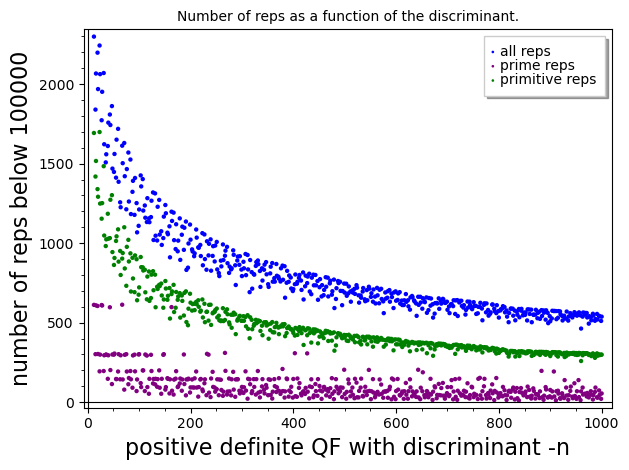

In [44]:
allplot   = list_plot(A[5::], color='blue',   legend_label='all reps')
primeplot = list_plot(P[5::], color='purple', legend_label='prime reps')
primitive = list_plot(R[5::], color='green',  legend_label='primitive reps')

combi = allplot + primeplot + primitive
combi.axes_labels(
    ['positive definite QF with discriminant -n',
    'number of reps below 100000']
)

show(combi, 
    title='Number of reps as a function of the discriminant.',
    frame=True,
    legend_loc="upper right"
)

<div style="width: 600px; text-align: justify;">
<h2 style="color: maroon;">References</h2>
<ul>
<li>Johannes Buchmann, Ulrich Vollmer: Binary Quadratic Forms, Springer, Berlin 2007.</li>
<li>Pete L. Clark, Topics in Arithmetic Geometry II, Handout 3: <a href="http://archive.wikiwix.com/cache/?url=http://math.uga.edu/~pete/8430notes3.pdf&amp;title=%C2%AB%C2%A0Topics%20in%20Arithmetic%20Geometry%20II%2C%20Handout%203%3A%20Elementary%20Theory%20of%20Quadratic%20Forms%C2%A0%C2%BB">Elementary Theory of Quadratic Forms</a>.</li>
<li>Henri Cohen, A Course in Computational Algebraic Number Theory, Springer 1993.</li>
<li>Franz Lemmermeyer, <a href="http://www.rzuser.uni-heidelberg.de/~hb3/publ/bf.pdf">Binary Quadratic Forms</a>, 2010.</li>
<li>Andrew Sutherland, Introduction to Arithmetic Geometry,
<a href="http://ocw.mit.edu/courses/mathematics/18-782-introduction-to-arithmetic-geometry-fall-2013/lecture-notes/MIT18_782F13_lec9.pdf">Lecture 9: Quadratic forms</a>, MIT Open Course Ware, Fall 2013. &nbsp; <span style="font-size: small; font-style: italic">Of special interest is definition 9.7 and theorem 9.9. Sutherland writes: &quot;The 
constraint that x!=0 is critical, otherwise every quadratic form would represent 0; the quadratic forms that represent 0 are of particular interest to us.&quot;</span></li>
<li>Elementary Number Theory – Section 3.2 <a href="http://www.math.ntu.edu.tw/~hchu/Number/ElementaryNumberTheory[3-2].pdf">Binary Quadratic Forms</a>. <br />
Elementary Number Theory – Section 3.3 <a href="http://www.math.ntu.edu.tw/~hchu/Number/ElementaryNumberTheory[3-3].pdf">Sums of two squares</a>.</li>
</ul>
</div>
